In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

this dataset contain 891 rows and 12 columns 1 is target variable and 11 are independent variable

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

there are three different data types int,float,object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Filling the missing Embarked values in given datasets with the majority ('S')
df.Embarked.fillna('S',inplace=True)

# Filling the missing values in the Age column in given datasets with the median age (28)
df.Age.fillna(df.Age.median(), inplace=True)


# Filling the missing values in the Fare column in the given datasets with the median fare
df.Fare.fillna(df.Fare.median(), inplace=True)

<Axes: >

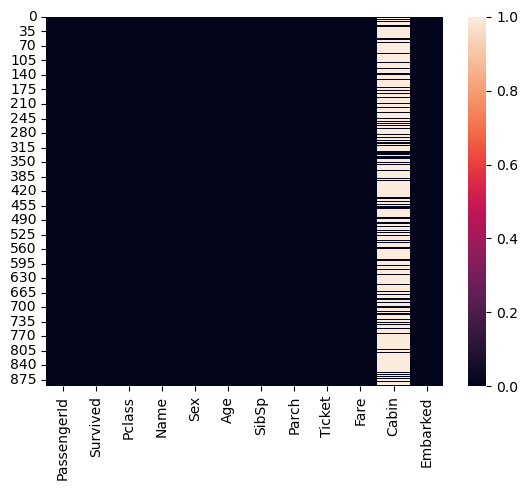

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.nunique().to_frame('No.of unique values')

,No.of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [12]:
# converting categorical data to numerical data
clean_data = {'Sex': {'male' : 0 , 'female' : 1} ,
                 'Embarked': {'C': 0 , 'Q' : 1,'S':'2'}}
               
df = df.copy()
df.replace(clean_data, inplace=True)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


it gives corelation between dependent and independent variables it can be visualise by heatmap

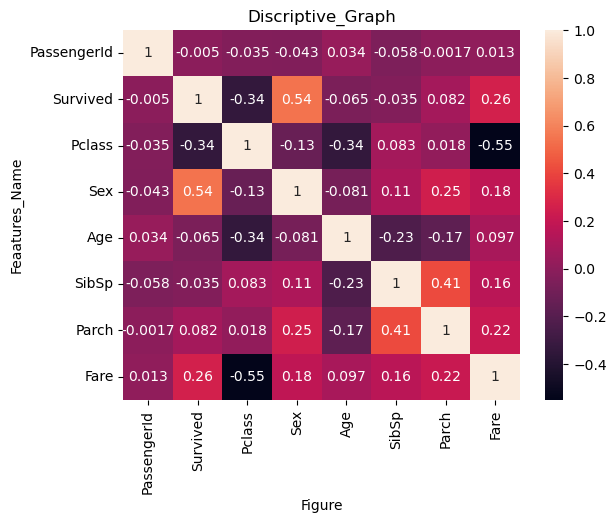

In [15]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.xlabel('Figure')
plt.ylabel('Feaatures_Name')
plt.title('Discriptive_Graph')
plt.show()

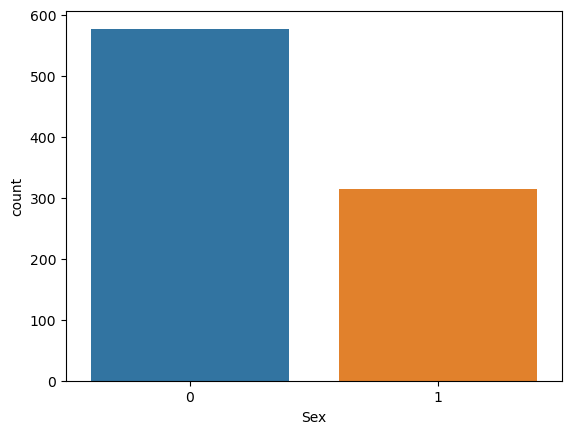

0    577
1    314
Name: Sex, dtype: int64

In [16]:
sns.countplot(x='Sex', data=df)
plt.show()

# Display the value counts
df['Sex'].value_counts()

,Sex,Survived
0,0,0.188908
1,1,0.742038


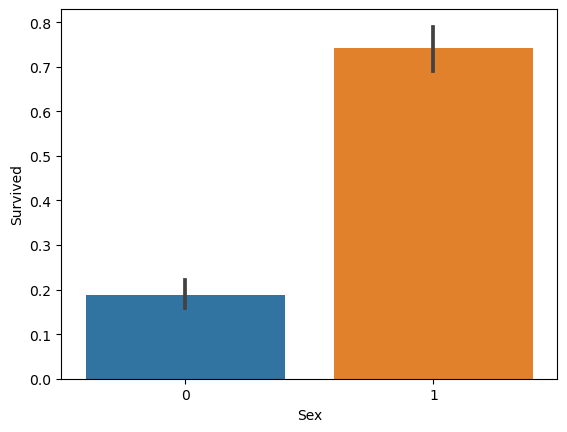

In [17]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


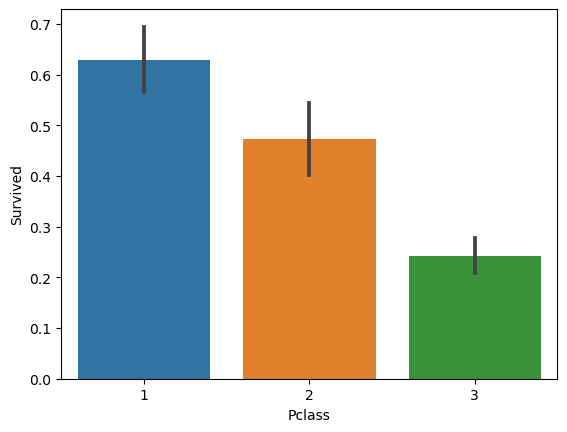

In [18]:
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


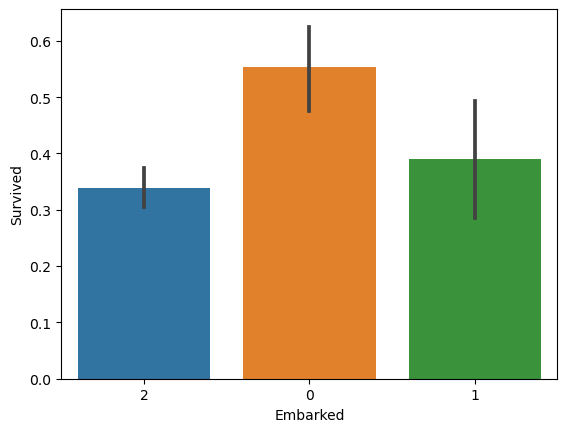

In [19]:
sns.barplot(x='Embarked',y='Survived',data=df)
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


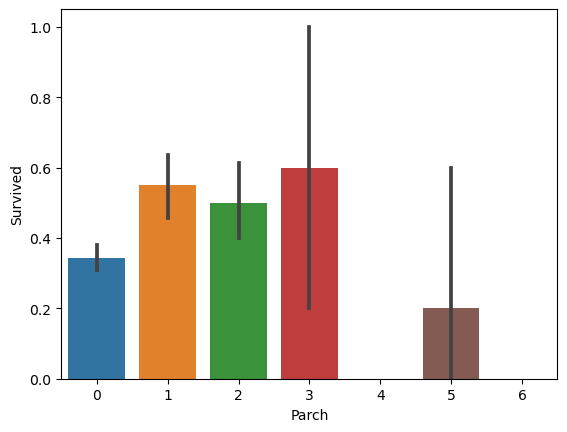

In [20]:
sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Passengers who had either 1, 2 or 3 children had a higher possibility of surviving than the ones that had none. However having more than 3 children made the possibility even lesser.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


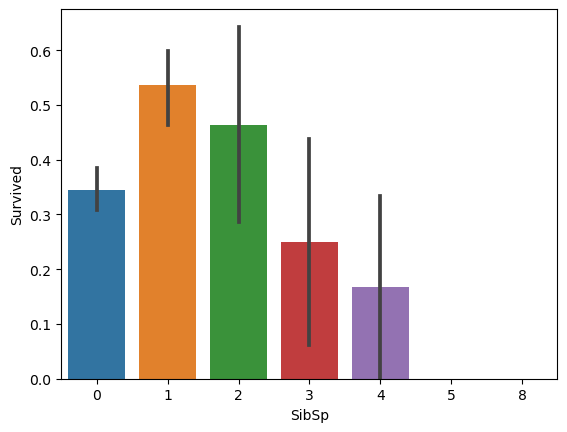

In [21]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. However, the chances of survival go down with the number of siblings increase beyond 1.



,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


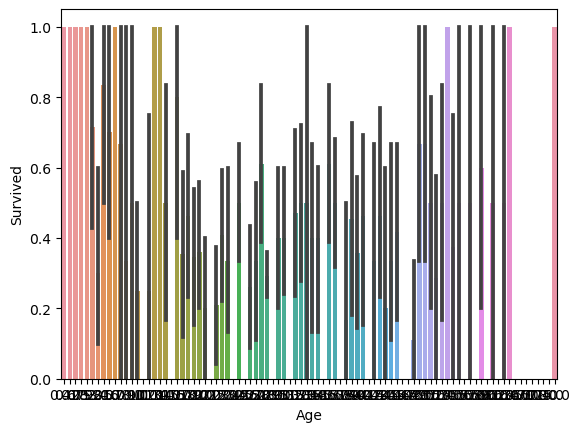

In [22]:
sns.barplot(x='Age',y='Survived',data=df)
df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)

In [23]:
x=df.drop(columns=['Survived','Name','Ticket'])
y=df['Survived']

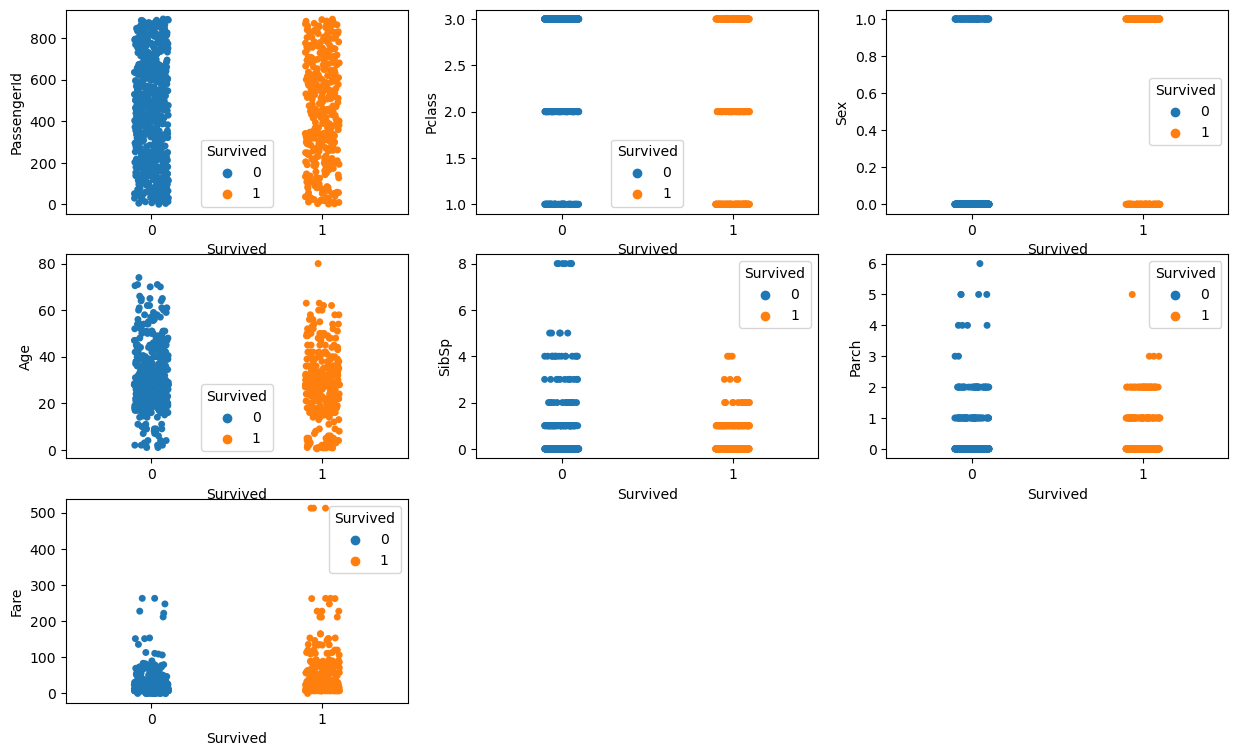

In [24]:
plt.figure(figsize=(15,9))
plotnumber=1
for column in x:
    if plotnumber<=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
        
    plotnumber+=1
plt.show()

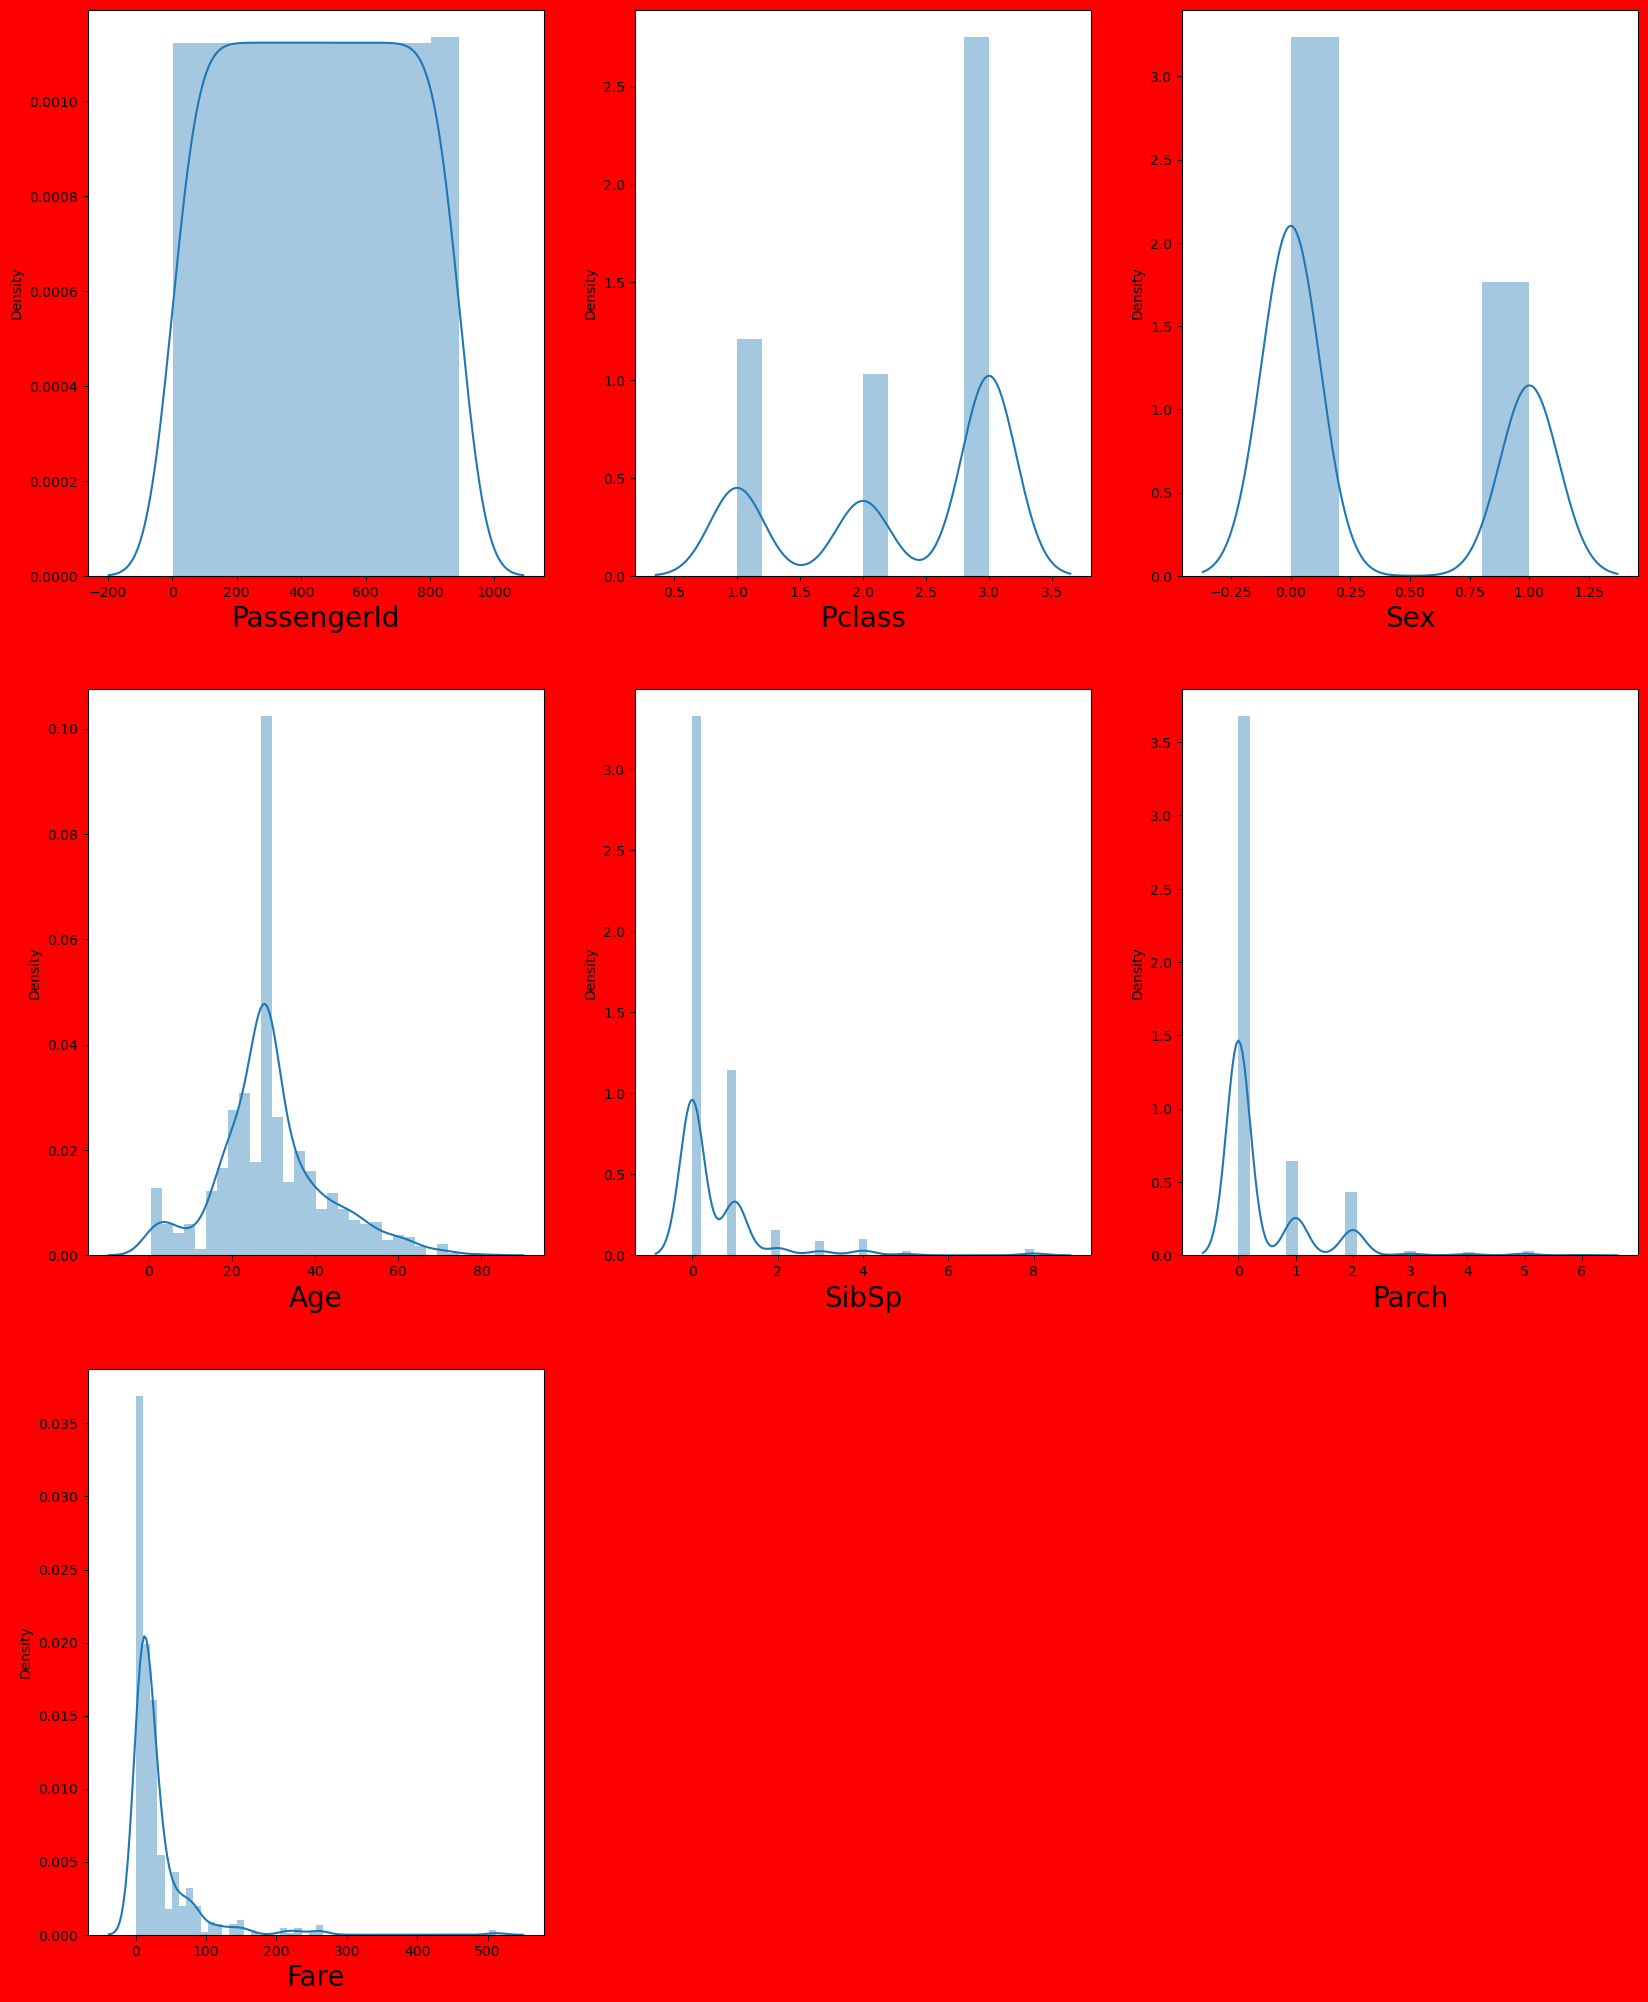

In [25]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in x:
    if plotnumber<=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

the above data gives there is no outliers present

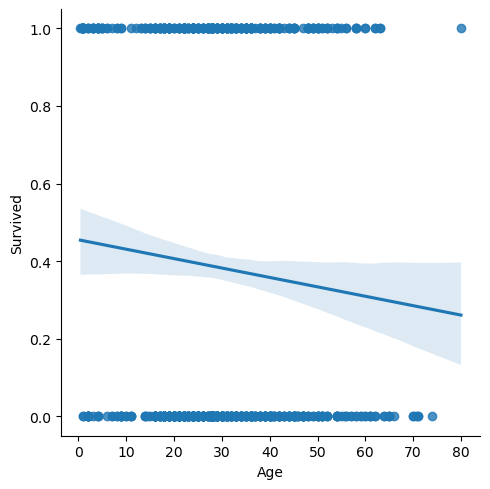

In [26]:
sns.lmplot(x='Age',y='Survived',data=df,palette='Set1')

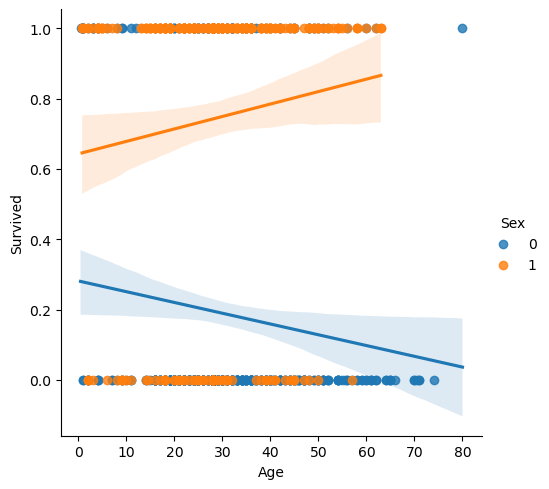

In [27]:
sns.lmplot(data=df, x="Age", y="Survived",hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

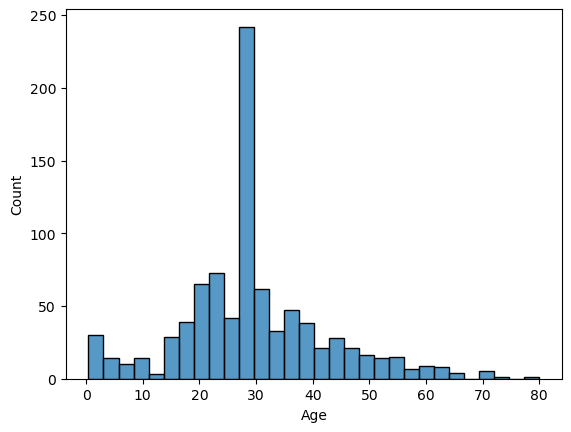

In [28]:
sns.histplot(data=df, x="Age", bins=30)

<Axes: xlabel='Age', ylabel='Count'>

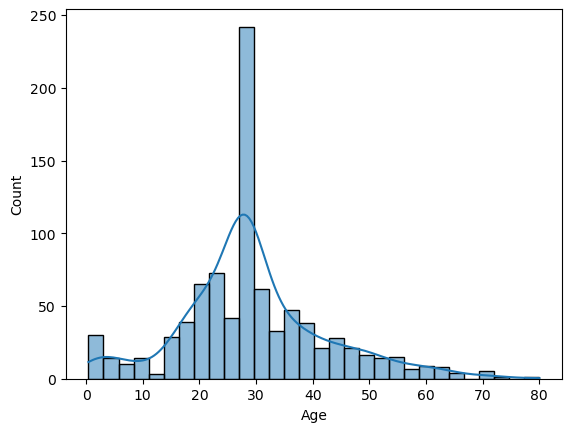

In [29]:
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Sex', ylabel='Age'>

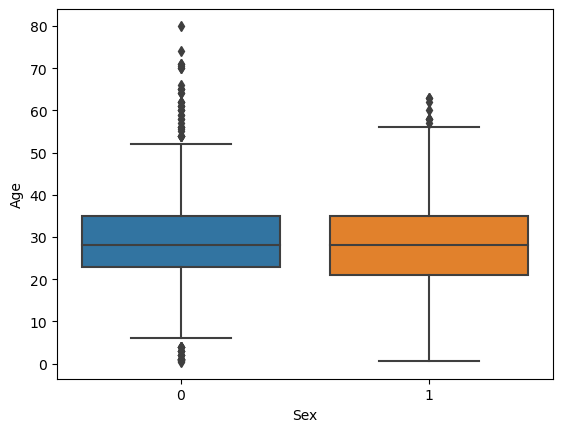

In [30]:
sns.boxplot(x='Sex',y='Age',data=df)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0


In [32]:
# Dropping columns which are not required
df = df.drop(['Cabin','Ticket','PassengerId','Name','Embarked'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [34]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# feature scaling

In [36]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [37]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,28.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [38]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.565736,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.663861,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.258337,-0.474545,-0.473674,-0.488854
3,-1.566107,1.355574,0.433312,0.432793,-0.473674,0.420730
4,0.827377,-0.737695,0.433312,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.181487,-0.474545,-0.473674,-0.386671
887,-1.566107,1.355574,-0.796286,-0.474545,-0.473674,-0.044381
888,0.827377,1.355574,-0.104637,0.432793,2.008933,-0.176263
889,-1.566107,-0.737695,-0.258337,-0.474545,-0.473674,-0.044381


# finding best random state

In [39]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(X_train,Y_train)
    pred=RFR.predict(X_test)
    acc=accuracy_score(Y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is-",maxAccu,"at randomstate is -",maxRS)

Best accuracy is- 0.8770949720670391 at randomstate is - 132


# creating train test split¶

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxRS)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# classification Algoritham

In [42]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC=RFC.predict( X_test)
print(accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))

0.8547486033519553
[[103  14]
 [ 12  50]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       117
           1       0.78      0.81      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.86      0.85      0.86       179



accuracy of this model is 85%

In [43]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict( X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.8268156424581006
[[99 18]
 [13 49]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



accuracy of this model is 82%

In [44]:
# check accuracy for support vector machine classifier
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict( X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.8659217877094972
[[109   8]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       117
           1       0.85      0.74      0.79        62

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



accuracy of this model is 86%

In [45]:
GB=GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB=GB.predict( X_test)
print(accuracy_score(Y_test,predGB))
print(confusion_matrix(Y_test,predGB))
print(classification_report(Y_test,predGB))

0.8770949720670391
[[105  12]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       117
           1       0.81      0.84      0.83        62

    accuracy                           0.88       179
   macro avg       0.86      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



accuracy of this model is 87%

In [46]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
predabc=abc.predict( X_test)
print(accuracy_score(Y_test,predabc))
print(confusion_matrix(Y_test,predabc))
print(classification_report(Y_test,predabc))

0.8324022346368715
[[102  15]
 [ 15  47]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



accuracy of this model is 83%

In [47]:
bc=BaggingClassifier()
bc.fit(X_train,Y_train)
predbc=bc.predict( X_test)
print(accuracy_score(Y_test,predbc))
print(confusion_matrix(Y_test,predbc))
print(classification_report(Y_test,predbc))

0.8994413407821229
[[109   8]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       117
           1       0.87      0.84      0.85        62

    accuracy                           0.90       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.90      0.90      0.90       179



accuracy of this model is 89%

In [48]:
et=ExtraTreesClassifier()
et.fit(X_train,Y_train)
predet=et.predict( X_test)
print(accuracy_score(Y_test,predet))
print(confusion_matrix(Y_test,predet))
print(classification_report(Y_test,predet))

0.8268156424581006
[[99 18]
 [13 49]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



accuracy of this model is 82%

In [49]:
#checking cv for random forest classifier
score=cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predRFC)-score.mean())

[0.77653631 0.81460674 0.83707865 0.76966292 0.83707865]
0.8069926558282594
Differences between Acuracy and cv score is- 0.04775594752369594


In [50]:
#checking cv for LogisticRegression
score=cross_val_score(LR,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predLR)-score.mean())

[0.7877095  0.7752809  0.78089888 0.75842697 0.8258427 ]
0.7856317870817903
Differences between Acuracy and cv score is- 0.04118385537631031


In [51]:
#checking cv for SVC
score=cross_val_score(svc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predsvc)-score.mean())

[0.83240223 0.82022472 0.81460674 0.81460674 0.85955056]
0.828278199736363
Differences between Acuracy and cv score is- 0.037643587973134274


In [52]:
#checking cv for GradientBoostingClassifier
score=cross_val_score(GB,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predGB)-score.mean())

[0.83240223 0.8258427  0.86516854 0.8258427  0.8258427 ]
0.835019772770071
Differences between Acuracy and cv score is- 0.042075199296968124


In [53]:
#checking cv for AdaBoostClassifier
score=cross_val_score(abc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predabc)-score.mean())

[0.75977654 0.80898876 0.82022472 0.8258427  0.83707865]
0.8103822735547046
Differences between Acuracy and cv score is- 0.02201996108216686


In [54]:
#checking cv for BaggingClassifier
score=cross_val_score(bc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predbc)-score.mean())

[0.76536313 0.80337079 0.85393258 0.76966292 0.84269663]
0.807005209967987
Differences between Acuracy and cv score is- 0.09243613081413593


In [55]:
#checking cv for ExtraTreeClassifier
score=cross_val_score(et,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predet)-score.mean())

[0.74860335 0.7752809  0.83146067 0.74719101 0.81460674]
0.7834285355596007
Differences between Acuracy and cv score is- 0.043387106898499894


AdaBoostClassifier is our best model as the differences between accuracy and cv score is least

# AdaBoostClassifier is our best model

Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters={'estimator':[None],
            'n_estimators':[50], 
            'learning_rate':[1.0],
            'algorithm':['SAMME.R'], 
            'random_state':[None]}

In [58]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [59]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'estimator': [None],
                         'learning_rate': [1.0], 'n_estimators': [50],
                         'random_state': [None]})

In [60]:
GCV.best_params_

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [61]:
Final_model=AdaBoostClassifier(algorithm='SAMME.R',
 estimator=None,
 learning_rate=1.0,
 n_estimators=50,
 random_state= None)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

83.24022346368714


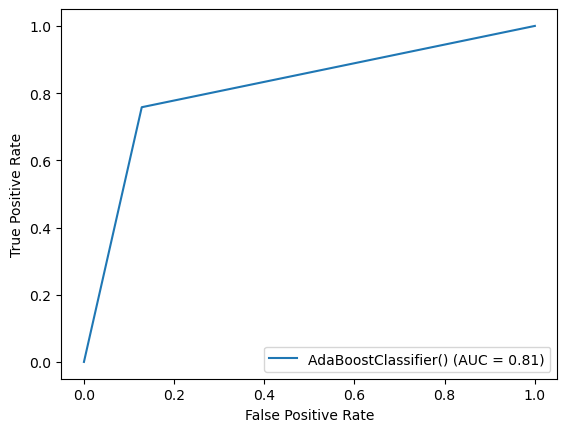

In [62]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

# Saving the model

In [63]:
import joblib
joblib.dump(Final_model,"TitanicSurvive.pkl")


['TitanicSurvive.pkl']

# Predicting the saved model

In [64]:
model=joblib.load("TitanicSurvive.pkl")
prediction=model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [65]:
x=np.array(Y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=x
df

,predicted,original
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
174,0,1
175,1,1
176,0,0
177,0,0


Finally I am saving my best classification model using the joblib library